In [92]:
#HARDCODED! Please fill in the cell name and folder that you gave during the Fiji scripts.

cell_name = 'Cell2'
folder = '/Users/vanessa/Desktop/Aug10'

#The following lines print what directory you're currently in to make it easier to know the path name to your cell.
import os
os.getcwd()

'/Users/vanessa/Desktop/Aug10'

In [93]:
#Import cell

import numpy
import matplotlib.pyplot as p
%matplotlib inline
from __future__ import division
import math
from matplotlib.patches import Patch
import sys
import matplotlib.image as mpimg
os.chdir(folder)
from matplotlib.font_manager import FontProperties

In [94]:
#Loading data that came from the Jython scripts

rawcoordinates = numpy.loadtxt(cell_name+'_coordinates.txt', delimiter = ",", skiprows = 17)
rawmeasurements = numpy.loadtxt(cell_name+'_results.txt', delimiter = '\t', skiprows = 1)
picture_info = numpy.loadtxt(cell_name+'_dimensions.txt')
rawthreshold = open(cell_name+'_coordinates.txt', 'r')

pixels_per_micron = picture_info[0]
image_frames = int(picture_info[1])

coordinates = numpy.transpose(rawcoordinates)
measurements = numpy.transpose(rawmeasurements)
#Note: 'm' from now on corresponds to mean intensity of the pole, while 'mean' corresponds to mean intensity on GFP channel
rawf = coordinates[0]
rawy = coordinates[1]
rawx = coordinates[2]
rawm = coordinates[3]
rawmean = measurements[1]
for index in range(len(rawf)):
    rawf[index] = rawf[index] +1
    
#Threshold print statement

threshold = rawthreshold.readline()
print("The automatic quality filter applied by Trackmate was: "+threshold)

The automatic quality filter applied by Trackmate was: 66.9796139464



In [95]:
#Here we find where to cut our data based tracks. We find where each track starts/ends and cut there. 
#There may be multiple tracks if Trackmate loses a pole then finds it again later.

cut_here = numpy.where(rawx == 0.)[0]
#Eliminate the row of zeros at the top of each track
cut = numpy.delete(cut_here, 0)
cut_1 = []
#We adjust where we cut for results since it has no rows of zeros.
for i in range(0, len(cut)):
    cut_1 = numpy.append(cut_1,(cut[i] - 1 - i))

x_cut = numpy.split(rawx, cut)
y_cut = numpy.split(rawy, cut)
f_cut = numpy.split(rawf, cut)
m_cut = numpy.split(rawm, cut)    
    
if len(cut_1) > 0:
    results_cut = cut_1.astype(int)
    trackmean = numpy.split(rawmean, results_cut)
else:
    results_cut=[]
    trackmean = [0 for index in range(len(x_cut))]
    trackmean[0] = rawmean

#These 2D arrays have all of the tracks in them separately
trackx = [0 for index in range(len(x_cut))]
for index in range(len(trackx)):
    trackx[index] = numpy.delete(x_cut[index], 0)
tracky = [0 for index in range(len(y_cut))]
for index in range(len(tracky)):
    tracky[index] = numpy.delete(y_cut[index], 0)
trackf = [0 for index in range(len(f_cut))]
for index in range(len(trackf)):
    trackf[index] = numpy.delete(f_cut[index], 0)
trackm = [0 for index in range(len(m_cut))]
for index in range(len(trackm)):
    trackm[index] = numpy.delete(m_cut[index], 0)

In [96]:
#HARDCODED!
#If you'd like to plan where you want to cut the data between useful and not useful once you have the data in Excel,
#enter the proposed frame values below:

start = 2
end = 10

(1319.538, 3052.4169999999999)

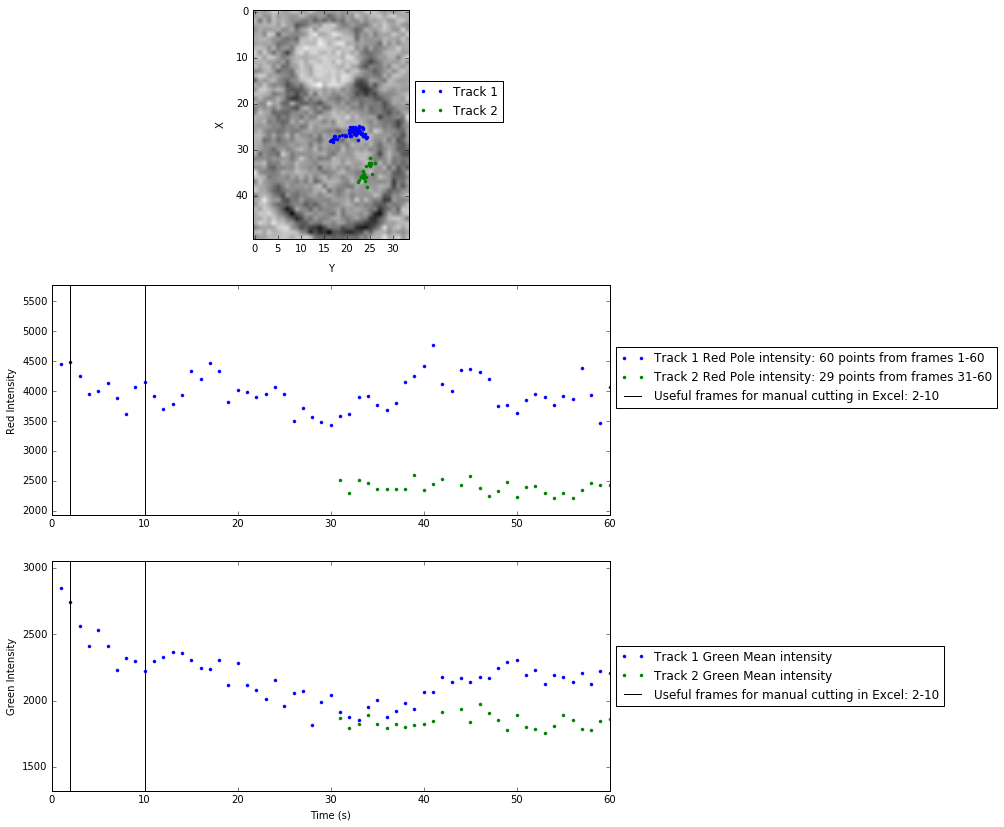

In [97]:
#This cell plots our diagnostic tools. 

l1, l2, font, s1, s2, padding = 3.0, 10.0, 10.0, 10.0, 14.0, 10.0
fig = p.figure('Image', figsize = (s1,s2))
p.rcParams.update({'font.size':font})
ax = fig.add_subplot(3,1,1)


first_subplot_x = []
first_subplot_y = []
#First Subplot
for index in range(len(trackx)):
    trackid = str(index+1)
    first_subplot_x = trackx[index] * pixels_per_micron
    first_subplot_y = tracky[index] * pixels_per_micron
    p.plot(first_subplot_x, first_subplot_y, linestyle = "", marker = ".", label="Track "+trackid)
p.xlabel("Y", labelpad=padding)
p.ylabel("X", labelpad=padding)
p.legend(loc = "center left", bbox_to_anchor=(1,0.6))
image = mpimg.imread(cell_name + '_BF.png')
p.imshow(image, cmap = 'binary')

#Second Subplot
for index in range(len(trackf)):
    trackid = str(index+1)
    length = str(len(trackf[index]))
    first_spot = str(int(numpy.amin(trackf[index])))
    last_spot = str(int(numpy.amax(trackf[index])))
    axr = fig.add_subplot(3,1,2)
    p.plot(trackf[index],trackm[index], linestyle = "", marker = ".",markersize = 6,label ="Track "+trackid+" Red Pole intensity: "+length+" points from frames "+first_spot+"-"+last_spot)
#Useful frames lines:
startx = [start, start]
starty = [0, 50000]
endx = [end, end]
endy = [0, 50000]
p.plot(startx, starty, label = "Useful frames for manual cutting in Excel: " + str(start) + "-" + str(end), color = 'k')
p.plot(endx, endy, color = 'k')
p.ylabel("Red Intensity")
p.legend(loc = "center left", bbox_to_anchor=(1,0.6))
p.ylim(numpy.amin(trackm[0])-1500, numpy.amax(trackm[0])+1000)

#Third Subplot
for index in range(len(trackf)):
    trackid = str(index+1)
    axr = fig.add_subplot(3,1,3)
    p.plot(trackf[index],trackmean[index], linestyle = "", marker = ".",markersize = 6,label ="Track "+trackid+" Green Mean intensity")
#Useful frames lines:
startx = [start, start]
starty = [0, 50000]
endx = [end, end]
endy = [0, 50000]
p.plot(startx, starty, label = "Useful frames for manual cutting in Excel: " + str(start) + "-" + str(end), color = 'k')
p.plot(endx, endy, color = 'k')
p.xlabel("Time (s)")
p.ylabel("Green Intensity")
p.legend(loc = "center left", bbox_to_anchor=(1,0.5))
p.ylim(numpy.amin(trackmean[0])-500, numpy.amax(trackmean[0])+200)
#p.xlim(100, 180)

In [66]:
#HARDCODED!
#For the following, fill in numbers in the following form: [1, 2, 3] for multiple, [2] for only one, or leave as [] for none.

#Fill in the track numbers you wish to delete, if any.
Tracks_to_Delete = []

#Fill in the track number(s) that correspond to the old pole.
Tracks_for_Old = [1,6,8,10]

#Fill in the track number(s) that correspond to the new pole, if any.
Tracks_for_New = [2,3,4,5,7,9,11]

In [76]:
#Deletes the tracks that were asked to be deleted

newtrackx = trackx
newtracky = tracky
newtrackf = trackf
newtrackm = trackm
newtrackmean = trackmean

for index in range(len(Tracks_to_Delete)):
    variable = Tracks_to_Delete[index] - 1
    newtrackx = numpy.delete(trackx, variable)
    newtracky = numpy.delete(tracky, variable)
    newtrackf = numpy.delete(trackf, variable)
    newtrackm = numpy.delete(trackm, variable)
    newtrackmean = numpy.delete(trackmean, variable)

In [77]:
#This is used just for distance calculations which don't care what is old vs new.
#These arrays append all of the tracks together, except those to be deleted.

x = []
for index in range(len(newtrackx)):
    x = numpy.append(x, newtrackx[index])
y = []
for index in range(len(newtracky)):
    y = numpy.append(y, newtracky[index])
f = []
for index in range(len(newtrackf)):
    f = numpy.append(f, newtrackf[index])
m = []
for index in range(len(newtrackm)):
    m = numpy.append(m, newtrackm[index])
mean = []
for index in range(len(newtrackmean)):
    mean = numpy.append(mean, newtrackmean[index])

#Catches common index-array errors and provides explanations.
if(len(f) == (len(mean)*2)):
    sys.exit("You didn't close ROI manager between tracking cells. Please rerun current cell after closing ROI manager.")
elif(len(f) != len(mean)):
    sys.exit("You cropped the cell too tightly. Unable to calculate mean GFP value when pole gets too close to edge of image.")

In [78]:
#Distance calculation cell.

distance = []
distancef = []
xdifference = 0.
ydifference = 0.
firstindex = 0
secondindex = 0
somearray = []
#Looks through all points
for index in range(len(f)-1):
    #Asks if there are more than one spot in this time frame
    if(len(numpy.where(f == f[index])[0]) != 1):
        #Asks if this time frame has already been recorded
        somearray = numpy.where(distancef == f[index])[0]
        if not somearray:
            #These are the indices of the two spots that exist during time frame f[index]
            firstindex = numpy.where(f == f[index])[0][0]
            secondindex = numpy.where(f == f[index])[0][1]
            #Calculates distance between them
            xdifference = x[firstindex]-x[secondindex]
            ydifference = y[firstindex]-y[secondindex]
            distance = numpy.append(distance,numpy.sqrt(xdifference**2 + ydifference**2))
            distancef = numpy.append(distancef,f[index])

#Putting these two arrays into one 2D array
distance_info = [[]for i in range(2)] 
distance_info[0] = distancef
distance_info[1] = distance

In [79]:
#Creates 'old' and 'new' matrices from the tracks specified by the user.

old = [()for i in range(5)] 
new = [()for i in range(5)]

for index in range(len(Tracks_for_Old)):
    variable = Tracks_for_Old[index] - 1
    old[0] = numpy.append(old[0], trackf[variable])
    old[1] = numpy.append(old[1], trackx[variable])
    old[2] = numpy.append(old[2], tracky[variable])
    old[3] = numpy.append(old[3], trackm[variable])
    old[4] = numpy.append(old[4], trackmean[variable])
    
for index in range(len(Tracks_for_New)):
    variable = Tracks_for_New[index] - 1
    new[0] = numpy.append(new[0], trackf[variable])
    new[1] = numpy.append(new[1], trackx[variable])
    new[2] = numpy.append(new[2], tracky[variable])
    new[3] = numpy.append(new[3], trackm[variable])
    new[4] = numpy.append(new[4], trackmean[variable])

In [80]:
#Something about second index makes the new matrix double itself. Here we delete this extra copy of it.

#Looks through all points
for index in range(len(new[0])-5):
    #Asks if this time frame has already been recorded
    already_in_new = numpy.where(new[0] == new[0][index])[0]
    #Deletes the double
    if(len(already_in_new) == 2):
        new = numpy.delete(new, (already_in_new[1]), axis=1)

In [81]:
#Transposing our 2D arrays to make them nice in excel format.
save_old = numpy.transpose(old)
save_new = numpy.transpose(new)
save_distance_info = numpy.transpose(distance_info)

#Sorting our arrays by frame so they're more usable in excel.
sorted_old = save_old[save_old[:,0].argsort()]
sorted_new = save_new[save_new[:,0].argsort()]
sorted_distance_info = save_distance_info[save_distance_info[:,0].argsort()]

In [52]:
#Deleting extraneous files created during this entire FIJI/Jupyter process

os.remove(cell_name+"_dimensions.txt")
os.remove(cell_name + "_BF.png")
os.remove(cell_name+"_coordinates.txt")
os.remove(cell_name+"_results.txt")

In [82]:
#Saving our data in Excel files.

numpy.savetxt(cell_name+" Old Pole Data.txt", sorted_old, delimiter = '\t', newline = '\n', header = "Frame | X | Y | Mean Pole Intensity | Mean GFP Intensity")
numpy.savetxt(cell_name+" New Pole Data.txt", sorted_new,  delimiter = '\t', newline = '\n', header = "Frame | X | Y | Mean Pole Intensity | Mean GFP Intensity")
numpy.savetxt(cell_name+" 2D Pole Distance Data.txt", sorted_distance_info,  delimiter = '\t', newline = '\n', header = "Frame | Distance (microns)")